In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 

In [2]:
pd.options.display.max_rows = 4000

In [3]:
df = pd.read_csv('train.csv')

In [4]:
test = pd.read_csv('test.csv')

In [5]:
df.shape

(1460, 81)

In [6]:
df.isnull().sum() 

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<Axes: >

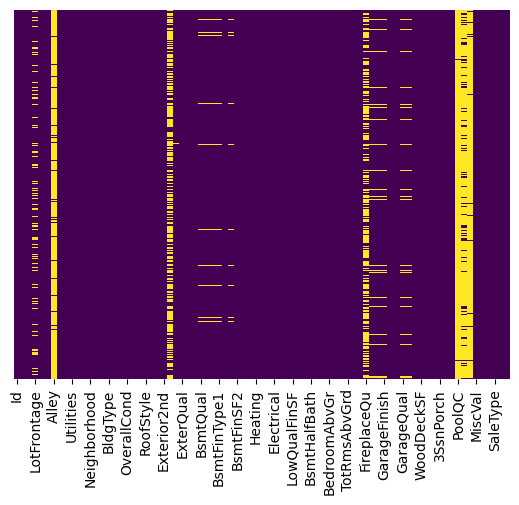

In [8]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')


In [9]:
df['BsmtQual'].mode()[0]

'TA'

In [10]:
# Fill missing values for our training dataset

df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean())

df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])



In [11]:
df['FireplaceQu'] = df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])

df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0])
df['GarageFinish'] = df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])

df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [12]:

# drop the columns that contain 50% or more missing values
df.drop(['Id', 'Alley', 'MasVnrType', 'PoolQC','Fence', 'MiscFeature'], axis = 1, inplace = True)

In [13]:
df.columns[df.isnull().any()]

Index([], dtype='object')

In [14]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional  

In [15]:
missing_vals = test.isnull().sum()
missing_vals[missing_vals > 0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [16]:
# Do the same for our test data set

# test['MSZoning'] = test['MSZoning'].fillna(test['MSZoning'].mode()[0])

# test['LotFrontage'] = test['LotFrontage'].fillna(test['LotFrontage'].mean())
# test['MasVnrArea'] = test['MasVnrArea'].fillna(test['MasVnrArea'].mean())
# test['BsmtQual'] = test['BsmtQual'].fillna(test['BsmtQual'].mode()[0])
# test['BsmtCond'] = test['BsmtCond'].fillna(test['BsmtCond'].mode()[0])
# test['BsmtExposure'] = test['BsmtExposure'].fillna(test['BsmtExposure'].mode()[0])
# test['BsmtFinType1'] = test['BsmtFinType1'].fillna(test['BsmtFinType1'].mode()[0])
# test['BsmtFinType2'] = test['BsmtFinType2'].fillna(test['BsmtFinType2'].mode()[0])
# test['Electrical'] = test['Electrical'].fillna(test['Electrical'].mode()[0])



In [17]:
test.drop(['Id', 'Alley', 'MasVnrType', 'PoolQC','Fence', 'MiscFeature'], axis = 1, inplace = True)

In [18]:
def fill_missing_values(df):

    df_filled = df.copy()
    for col in df.columns:
        
        if df[col].dtype == 'object':
            mode_value = df[col].mode()[0]
            df_filled[col].fillna(mode_value, inplace = True)
        else:
            mean_value = df[col].mean()
            df_filled[col].fillna(mean_value, inplace = True)
    return df_filled




In [19]:
test = fill_missing_values(test)
test.columns[test.isnull().sum() > 0]

Index([], dtype='object')

In [20]:
# ensures every categorical value is accounted for before encoding
combined_df = pd.concat([df, test], axis = 0)
combined_df.shape

combined_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000.0


In [21]:
def onehot_encoder(combined_df,  columns):
    df_result = combined_df
    
    i = 0
    for fields in columns:
        
        df_dummies = pd.get_dummies(df_result[fields], drop_first = True)
        df_result.drop([fields], axis = 1, inplace = True)

        if i == 0:
            df_result = df_dummies.copy()
        else:
            df_result = pd.concat([df_result, df_dummies], axis = 1)
        i += 1
    df_result = pd.concat([df_result, combined_df], axis = 1)
    return df_result


    

In [22]:
list(combined_df.columns)[:5]

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street']

In [23]:
# Get only the categorical columns
categorical_features = df.select_dtypes(include = ['object']).columns.tolist()
len(categorical_features)
print(categorical_features)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [24]:
combined_df['Street'].head(5)

0    Pave
1    Pave
2    Pave
3    Pave
4    Pave
Name: Street, dtype: object

In [25]:
# temp_df = onehot_encoder(combined_df, categorical_features)
df_encoded = pd.get_dummies(combined_df, columns=categorical_features,
                             prefix=categorical_features)


In [26]:
df_encoded.shape

(2919, 272)

In [27]:
# df_encoded = df_encoded.loc[:, ~df_encoded.duplicated()]
# df_encoded = df_encoded.loc[:,~df_encoded.columns.duplicated()]

df_encoded.isnull().sum()

MSSubClass                  0
LotFrontage                 0
LotArea                     0
OverallQual                 0
OverallCond                 0
YearBuilt                   0
YearRemodAdd                0
MasVnrArea                  0
BsmtFinSF1                  0
BsmtFinSF2                  0
BsmtUnfSF                   0
TotalBsmtSF                 0
1stFlrSF                    0
2ndFlrSF                    0
LowQualFinSF                0
GrLivArea                   0
BsmtFullBath                0
BsmtHalfBath                0
FullBath                    0
HalfBath                    0
BedroomAbvGr                0
KitchenAbvGr                0
TotRmsAbvGrd                0
Fireplaces                  0
GarageYrBlt                 0
GarageCars                  0
GarageArea                  0
WoodDeckSF                  0
OpenPorchSF                 0
EnclosedPorch               0
3SsnPorch                   0
ScreenPorch                 0
PoolArea                    0
MiscVal   

In [28]:
df_Train = df_encoded.iloc[:1460, :]
df_Test = df_encoded.iloc[1460:, :]

In [29]:
df_Test.drop(['SalePrice'], axis = 1, inplace = True)
df_Test.columns[df_Test.isnull().sum() > 0]


/var/folders/bd/126yvkv50d1cjxc0144dqz4c0000gn/T/ipykernel_49654/3092413244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Test.drop(['SalePrice'], axis = 1, inplace = True)


Index([], dtype='object')

In [30]:
df_Train.columns[df_Train.isnull().sum() > 0]
X  = df_Train.drop(['SalePrice'], axis = 1)
y = df_Train['SalePrice']

***Models/predictions***

In [31]:
import xgboost
regressor = xgboost.XGBRegressor()

In [46]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.1, 0.01, 0.003],
    'max_depth': [2, 3, 5, 7, 10],
    'n_estimators': [100, 200, 300, 500, 700, 1000],
    'subsample': [0.8, 1.0],
    'booster': ['gbtree','gblinear'],
}


In [47]:
grid_search = GridSearchCV(estimator= regressor, param_grid= param_grid, 
                           scoring = 'neg_mean_absolute_error', n_jobs = 4, 
                           return_train_score= True)


In [48]:
print(X.shape)
print(y.shape)
y.head()

(1460, 271)
(1460,)


0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
Name: SalePrice, dtype: float64

In [49]:
grid_search.fit(X,y)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [03:54:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_depth", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [03:54:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_depth", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [03:54:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_depth", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [03:54:39] WARNING: /Users/runner/work/xgbo

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=4,
             param_grid={'booster': ['gbtree', 'gblinear'],
                         'learning_rate': [0.1, 0.01, 0.003],
                         'max_depth': [2, 3, 5, 7, 10],
                         'n_estimators': [100, 200, 300, 500, 700, 1000],
                         'subsample': [0.8, 1.0]},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [50]:
best_model = grid_search.best_estimator_

In [51]:
y_pred = best_model.predict(df_Test)

In [52]:
y_pred

array([125800.58, 156274.47, 181994.27, ..., 166559.36, 120450.07,
       223859.03], dtype=float32)

In [54]:
test = pd.read_csv('test.csv')

output = pd.DataFrame({'Id': test['Id'], 'SalePrice': y_pred})
print(len(output))
output.to_csv('xg_model_results.csv', index=False)



1459
